In [4]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [5]:
def start_play(state:State):
    print("Start_play node has been called")
    return{"graph_info":state['graph_info'] + " I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info'] + " cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " badminton"}

In [6]:
import random
from typing import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

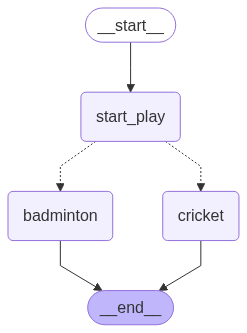

In [7]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## build graph
graph = StateGraph(State)

# Adding the nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("badminton", badminton)

# schedule the graph

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

## compile the graph
graph_builder = graph.compile()

## view the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke({"graph_info":"Hey My name is pavi "})

Start_play node has been called
My Cricket node has been called


{'graph_info': 'Hey My name is pavi  I am planning to play cricket'}